**Supervised Learning**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#input and output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [3]:
#defining a 1D linear regression model
def f(x, phi0, phi1):
  y = phi0 + phi1 * x
  return y

In [4]:
#function to help in the plotting of the data
def plot(x, y, phi0, phi1):
  fig,ax = plt.subplots() #creates a new figure and an axis using plt.subplots()

  ax.scatter(x, y) #creates a scatter plot

  plt.xlim([0, 2.0]) #sets the limits of the x and y axis
  plt.ylim([0, 2.0])

  ax.set_xlabel("Input, x")
  ax.set_ylabel("Output, y")

  #Drawing the line
  x_line = np.arange(0, 2, 0.01) #creates the data points.
  y_line = f(x_line, phi0, phi1)

  plt.plot(x_line, y_line, 'b-', lw = 2) #color blue, line width 2

  plt.show()


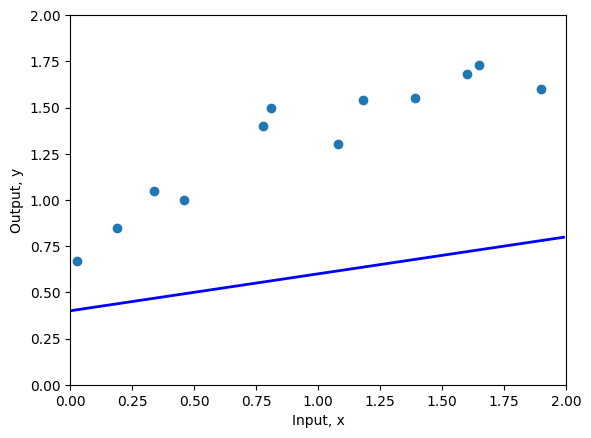

In [5]:
#Initializing the y-intercept (bias) and the slope
phi0 = 0.4 ; phi1 = 0.2

#Calling the plot function
plot(x, y, phi0, phi1)

# Loss


In [12]:
#function to calculate the loss
def compute_loss(x, y, phi0, phi1):

  loss = np.sum((phi0 + (phi1*x) - y)**2)

  return loss

In [13]:
#computing the loss for this model
loss = compute_loss(x, y, phi0, phi1)
print(f"Your loss is {loss:3.2f} Ground Truth = 7.07")

Your loss is 8.63 Ground Truth = 7.07


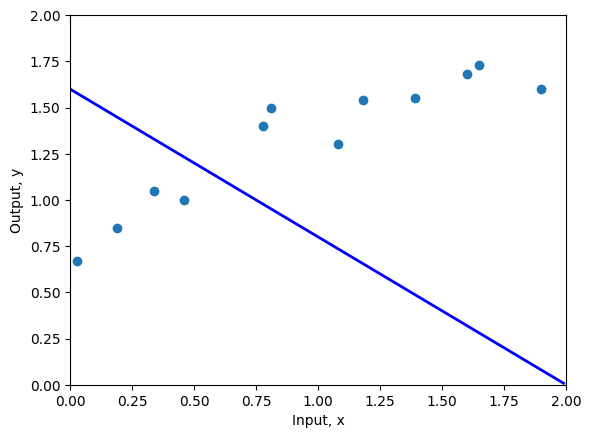

The loss is 10.28, Ground Truth = 10.28 


In [14]:
#Setting the intercept and the slope as the one in figure 2.2c
phi0 = 1.60 ; phi1 = -0.8

#plotting the data and the model
plot(x, y, phi0, phi1)
loss = compute_loss(x, y, phi0, phi1)
print(f"The loss is {loss:3.2f}, Ground Truth = 10.28 ")

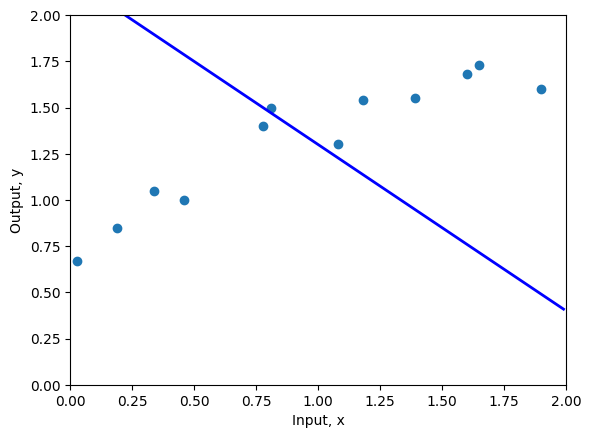

Your Loss = 8.63


In [15]:
#Changing parameters to manually fit the model as in 2.2d
#Did it by hand.
phi0 = 2.20 ; phi1 =-0.9

plot(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0,phi1):3.2f}')


# Visualizing/Plotting the loss function

In [16]:
#Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0, 2.0, 0.02), np.arange(-1.0, 1.0, 0.02))

#Making a 2D array to contain alll the losses.
all_losses = np.zeros_like(phi1_mesh)

# Reshape all_losses to make it a 2D array
all_losses_2D = np.reshape(all_losses, phi0_mesh.shape)


#Running through each combination of phi0, phi1 and computing loss
for indices, temp in np.ndenumerate(phi1_mesh):
  all_losses = compute_loss(x, y, phi0_mesh[indices], phi1_mesh[indices])

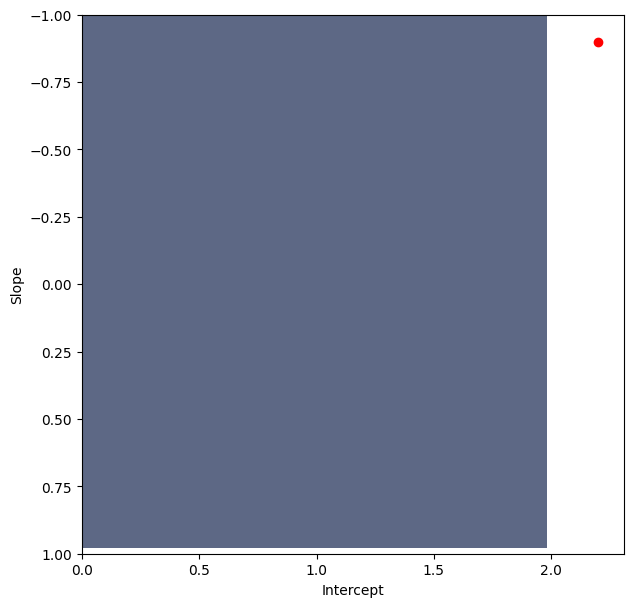

In [17]:
#Plotting the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)

levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses_2D ,levels)

levels = 40
ax.contourf(phi0_mesh, phi1_mesh, all_losses_2D, levels, colors = ['#80808080'])
ax.set_ylim ([1, -1])
ax.set_xlabel("Intercept")
ax.set_ylabel("Slope")

ax.plot(phi0, phi1, "ro")
plt.show()